In [2]:
using OrdinaryDiffEq, LaTeXStrings, Plots, Printf;


In [3]:
tspan = (0.0, 100.0);
ϵ = 0.1
ϵ2 = 0.01
ϵ3 = 0.5


0.5

In [4]:
function vanderPol1!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    return dv[2] = ϵ * (1 - u^2) * du - u
end


vanderPol1! (generic function with 1 method)

In [5]:
function vanderPol2!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    return dv[2] = ϵ2 * (1 - u^2) * du - u
end


vanderPol2! (generic function with 1 method)

In [6]:
function vanderPol3!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    return dv[2] = ϵ3 * (1 - u^2) * du - u
end


vanderPol3! (generic function with 1 method)

In [7]:
a = 2
u0 = [a, 0]

prob1 = ODEProblem(vanderPol1!, u0, tspan)
prob2 = ODEProblem(vanderPol2!, u0, tspan)
prob3 = ODEProblem(vanderPol3!, u0, tspan)

sol1 = solve(prob1, Tsit5(), reltol = 1.0e-8, abstol = 1.0e-8);
sol2 = solve(prob2, Tsit5(), reltol = 1.0e-8, abstol = 1.0e-8);
sol3 = solve(prob3, Tsit5(), reltol = 1.0e-8, abstol = 1.0e-8);


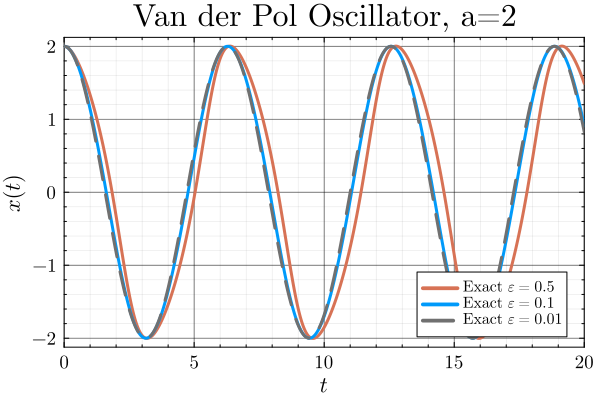

In [8]:
theme(:dao::Symbol)
plot(
    sol3,
    idxs = [1],
    line = (3, :solid),
    label = L"Exact $\epsilon = $%$ϵ3"
)
plot!(
    sol1,
    idxs = [1],
    line = (3, :solid),
    label = L"Exact $\epsilon = $%$ϵ"
)
plot!(
    sol2,
    idxs = [1],
    line = (3, :dash),
    label = L"Exact $\epsilon = $%$ϵ2",
    title = "Van der Pol Oscillator, a=$a",
    xlabel = L"$t$",
    ylabel = L"$x(t)$",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    right_margin = 2 * Plots.mm,
    xlims = (0, 20)
)
# savefig("Aero_Exam2_Prob1_exact.pdf")


### Plotting the Lindstedt Solution
___

In [17]:
tvals = collect(tspan[1]:0.001:tspan[2]);
ω = 1
τ(t) = ω * t;

lind0(t) = 2 * cos(τ(t))
lind1(t) = sin(τ(t))^3

lind(t, ϵ) = lind0(τ(t)) + ϵ * lind1(τ(t));


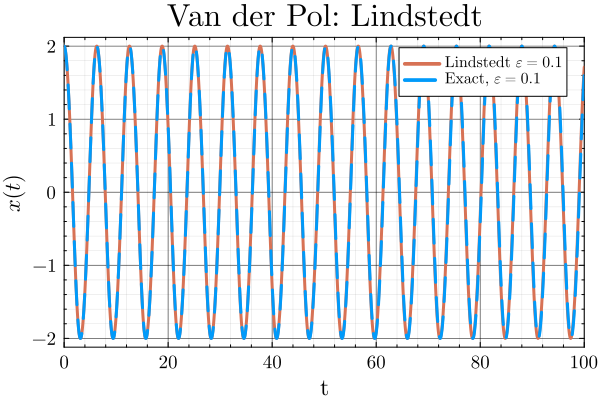

In [18]:
plot(
    tvals, lind.(tvals, ϵ),
    line = (3, :solid),
    label = L"Lindstedt $\epsilon = $%$ϵ",
    title = "Van der Pol: Lindstedt",
    xlabel = L"$t$",
    ylabel = L"$x(t)$",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15
)
plot!(
    sol1,
    idxs = [1],
    label = L"Exact, $\epsilon = $%$ϵ",
    line = (3, :dash),
    right_margin = 2 * Plots.mm
)
# savefig("Aero_Exam2_Prob1_Lind1.pdf")


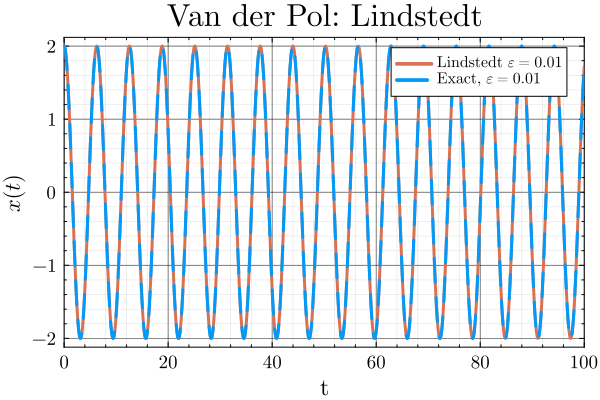

In [16]:
plot(
    tvals, lind.(tvals, ϵ2),
    line = (3, :solid),
    label = L"Lindstedt $\epsilon = $%$ϵ2",
    title = "Van der Pol: Lindstedt",
    xlabel = L"$t$",
    ylabel = L"$x(t)$",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15
)
plot!(
    sol2,
    idxs = [1],
    label = L"Exact, $\epsilon = $%$ϵ2",
    line = (3, :dash),
    right_margin = 2 * Plots.mm,
    # xlims = (0, 100),
)

# savefig("Aero_Exam2_Prob1_Lind2.pdf")


### Plotting the Pritulo Solution 
___

$$-\frac{1}{3} a e^{t/2} \left(\sqrt{3} \sin
   \left(\frac{\sqrt{3} t}{2}\right)-3 \cos
   \left(\frac{\sqrt{3} t}{2}\right)\right)$$

In [12]:
#=
t1(s) = -(1 / 6) * (-3 + 4 * cos(s) - cos(2s)) * cosc(s)
t2(s) = (1 / 9) * sin(s / 2)^2 * (3 * cos(s) + 4) * tan(s / 2)^3 # tan messes things up!

t(s, ϵ) = s + ϵ * t1(s) + ϵ^2 * t2(s)
=#
# prit(s, ϵ) = -(1 / 3) * a * exp(s / 2) * (sqrt(3) * sin(sqrt(3) * s / 2) - 3 * cos(sqrt(3) * s / 2))

# cos(t(s, ϵ)) + ϵ * ((4 / 3) * sin(t(s, ϵ) / 2)^4)
# + ϵ^2 * (1 / 72) * sin(t(s, ϵ) / 2) * (96 * sin(t(s, ϵ) / 2) + 29 * (3 * t(s, ϵ) / 2) - 3 * sin(5 * t(s, ϵ) / 2) - 84 * t(s, ϵ) * cos(t(s, ϵ) / 2))


$$\sin (s) \left(-2 t_1(s)+\frac{2}{5} \cos (2
   s)+\frac{1}{5}\right)+\frac{3 e^{-s}}{5}-\frac{3}{5} \cos (3 s)$$


In [13]:
s(t) = t
prit(t, ϵ) = a * cos(s(t)) + ϵ * ((1 / 5) * 3 * exp(-s(t)) - (3 / 5) * cos(3 * s(t)));


In [14]:
plot(
    sol1,
    idxs = [1],
    label = L"Exact, $\epsilon = $%$ϵ",
    line = (3, :solid),
    right_margin = 2 * Plots.mm,
    title = "Van der Pol: Pritulo",
    xlabel = L"$s$",
    ylabel = L"$x(s)$",
    legend = :topright,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15
)

plot!(
    tvals, prit.(tvals, ϵ),
    label = L"Pritulo, $\epsilon = $%$ϵ",
    line = (3, :dash),
    # right_margin = 2 * Plots.mm
    # xlims = (0, 50),
    # ylims = (-2, 2)
)

savefig("Aero_Exam2_Prob1_Prit1.pdf")


"/home/belster/JuliaFiles/Aero/exam2/Aero_Exam2_Prob1_Prit1.pdf"

In [15]:
plot(
    sol2,
    idxs = [1],
    label = L"Exact, $\epsilon = $%$ϵ2",
    line = (3, :solid),
    right_margin = 2 * Plots.mm,
    title = "Van der Pol: Pritulo",
    xlabel = L"$s$",
    ylabel = L"$x(s)$",
    legend = :topright,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15
)

plot!(
    tvals, prit.(tvals, ϵ2),
    label = L"Pritulo, $\epsilon = $%$ϵ2",
    line = (3, :dash),
    # right_margin = 2 * Plots.mm
    # xlims = (0, 50),
    # ylims = (-100, 100)
)

savefig("Aero_Exam2_Prob1_Prit2.pdf")


"/home/belster/JuliaFiles/Aero/exam2/Aero_Exam2_Prob1_Prit2.pdf"